In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob

%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -uq "/content/drive/My Drive/Data_files.zip" -d "/content/drive/My Drive/"
  

In [0]:
labels_df = pd.read_csv('/content/drive/My Drive/Data_files/train_labels.csv')

In [5]:
labels_df.shape

(149, 1)

In [0]:
labels = np.array(labels_df.iloc[:,0].tolist())

In [7]:
labels

array([1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.])

In [0]:
files = sorted(glob.glob('/content/drive/My Drive/Data_files/train_data/*.png'))


In [0]:
train_images = []

In [0]:
train_images = np.array([cv2.imread(path) for path in files])

In [0]:
#images

In [0]:
#images

In [13]:
train_images.shape

(150,)

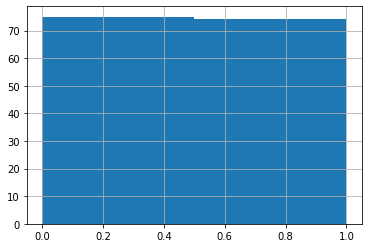

In [14]:
labels_df.iloc[:, 0].hist(bins=2)


In [0]:
train_images_df = pd.DataFrame(train_images, columns=['images'])

In [16]:
print(train_images_df.head())
print(train_images_df.shape)

                                              images
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
2  [[[23, 23, 23], [23, 23, 23], [23, 23, 23], [2...
3  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
(150, 1)


In [17]:
train_images_df.describe()

,images
count,150
unique,150
top,"[[[8, 8, 8], [8, 8, 8], [8, 8, 8], [8, 8, 8], ..."
freq,1


In [0]:
train_images_df['width'] = train_images_df['images'].apply(lambda x: x.shape[0])
train_images_df['height'] = train_images_df['images'].apply(lambda x: x.shape[1])


In [19]:
train_images_df.head()

,images,width,height
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",454,420
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",604,473
2,"[[[23, 23, 23], [23, 23, 23], [23, 23, 23], [2...",423,346
3,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...",554,408
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",135,140


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8823ac5f8>,
      dtype=object)

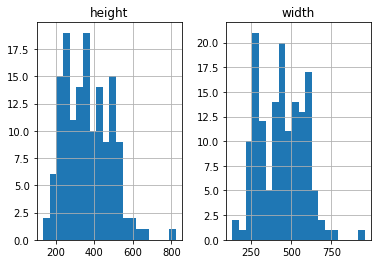

In [20]:
train_images_df[['height', 'width']].hist(bins=20)


In [21]:
train_images_df[['height', 'width']].describe()


,height,width
count,150.000000,150.00000
mean,364.060000,442.68000
std,118.582072,142.32227
min,134.000000,135.00000
25%,261.250000,304.25000
50%,352.000000,446.50000
75%,449.500000,557.25000
max,821.000000,957.00000


In [0]:
train_images = np.array([cv2.resize(image, (128, 128)) for image in train_images])


In [23]:
train_images.shape

(150, 128, 128, 3)

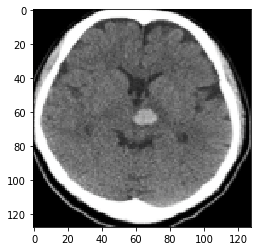

In [24]:
plt.imshow(train_images[0])


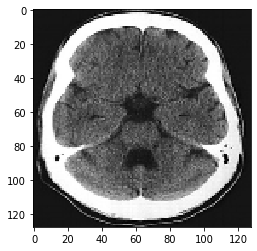

In [25]:
plt.imshow(train_images[149])

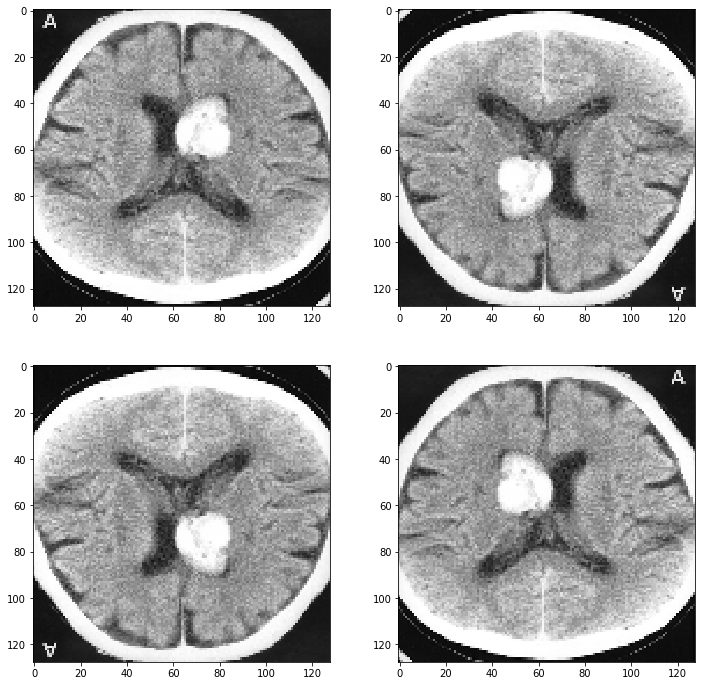

In [26]:
plt.figure(figsize=(12, 12))
for i, flip in enumerate([None, -1, 0, 1]):
    plt.subplot(221 + i)
    if flip is None:
        plt.imshow(train_images[10])
    else:
        plt.imshow(cv2.flip(train_images[10], flip))

In [27]:
print(labels)
print(train_images.shape)
print(labels.shape)

[1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0.]
(150, 128, 128, 3)
(149,)


In [0]:
labels = np.insert(labels, 0, 0.0, axis=0)

In [29]:
indicies = np.random.permutation(75)
train_true_idx, test_true_idx = indicies[:65], indicies[65:]
train_false_idx, test_false_idx = indicies[:65] + 75, indicies[65:] + 75
train_idx, test_idx = np.append(train_true_idx, train_false_idx), np.append(test_true_idx, test_false_idx)

train_validationX, train_validationY = train_images[train_idx], labels[train_idx]
testX, testY = train_images[test_idx], labels[test_idx]

print(train_validationX.shape, testX.shape)
print(train_validationY.shape, testY.shape)

(130, 128, 128, 3) (20, 128, 128, 3)
(130,) (20,)


In [0]:
#from sklearn.model_selection import train_test_split

In [0]:
#train_validationX

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

import math

Using TensorFlow backend.


In [0]:
train_image_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.,
    zoom_range=0.05,
    rotation_range=180,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='constant',
    cval=0
)
validation_image_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.,
    zoom_range=0.05,
    rotation_range=90,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='constant',
    cval=0)

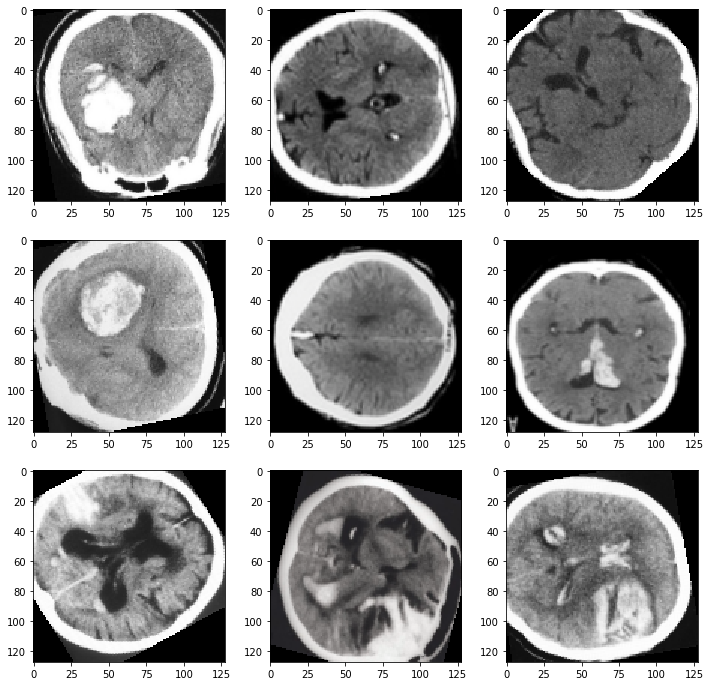

In [34]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_image_data.flow(train_validationX, train_validationY, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
    plt.show()
    break

In [0]:
def check_accuracy(model, setX, actual, print_images=True):
    predicted = np.array([int(x[0] > 0.5) for x in model.predict(setX)])
    if print_images:
        rows = math.ceil(len(predicted)/10.)
        plt.figure(figsize=(20, 3 * rows))
        for i in range(len(predicted)):
            plt.subplot(rows, 10, i+1)
            plt.imshow(setX[i])
            plt.title("pred "+str(predicted[i])+" actual "+str(actual[i]))
        
    confusion = confusion_matrix(actual, predicted)
    tn, fp, fn, tp = confusion.ravel()
    print("True positive:", tp, ", True negative:", tn,
          ", False positive:", fp, ", False negative:", fn)

    print("Total accuracy:", np.sum(predicted==actual) / len(predicted) * 100., "%")
    return (tn, fp, fn, tp)

In [0]:
def simple_conv_model(input_shape):
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'))
    
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.4))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(1, activation='sigmoid'))
    return model

In [37]:
model = simple_conv_model((128, 128, 3))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [41]:
model.fit_generator(train_image_data.flow(train_validationX, train_validationY, batch_size=128),
    steps_per_epoch=128,
    validation_data=validation_image_data.flow(testX, testY, batch_size=16),
    validation_steps=100,
    callbacks=[ModelCheckpoint("weights.h5", monitor='val_acc', save_best_only=True, mode='max')],
    epochs=16)

Epoch 1/16
128/128 [==============================] - 31s 240ms/step - loss: 0.6956 - acc: 0.5125 - val_loss: 0.6942 - val_acc: 0.5000
Epoch 2/16
128/128 [==============================] - 30s 236ms/step - loss: 0.6944 - acc: 0.5112 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 3/16
128/128 [==============================] - 30s 237ms/step - loss: 0.6927 - acc: 0.5197 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 4/16
128/128 [==============================] - 30s 237ms/step - loss: 0.6942 - acc: 0.4950 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 5/16
128/128 [==============================] - 30s 237ms/step - loss: 0.6956 - acc: 0.5049 - val_loss: 0.6934 - val_acc: 0.3600
Epoch 6/16
128/128 [==============================] - 30s 237ms/step - loss: 0.6943 - acc: 0.4604 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/16
128/128 [==============================] - 30s 237ms/step - loss: 0.6939 - acc: 0.5048 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/16
128/128 [==============================] - 3

True positive: 0 , True negative: 10 , False positive: 0 , False negative: 10
Total accuracy: 50.0 %


(10, 0, 10, 0)

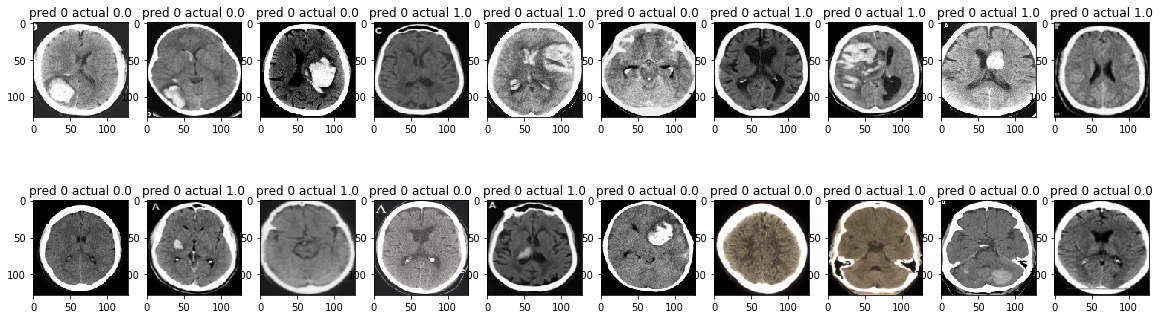

In [42]:
check_accuracy(model, testX/255., testY)

In [49]:
def imbalance_set(coeff=2):
    imbalanced_trainX = []
    imbalanced_trainY = []
    for i, train_x in enumerate(train_validationX):
        def add_entry(x, y):
            imbalanced_trainX.append(x)
            imbalanced_trainY.append(y)

        add_entry(train_x, train_validationY[i])

        if(train_validationY[i] == 1):
            for j in range(coeff-1):
                add_entry(train_x, train_validationY[i])
    return (np.array(imbalanced_trainX), np.array(imbalanced_trainY))

imbalanced_trainX, imbalanced_trainY = imbalance_set(2)
print(imbalanced_trainX.shape, imbalanced_trainY.shape)

(194, 128, 128, 3) (194,)


In [0]:
def bigger_conv_model(input_shape):
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'))
    
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.4))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(1, activation='sigmoid'))
    return model

In [51]:
model = bigger_conv_model((128, 128, 3))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
global_average_pooling2d_3 ( (None, 64)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

In [53]:
model.fit_generator(train_image_data.flow(imbalanced_trainX, imbalanced_trainY, batch_size=128),
    steps_per_epoch=128,
    validation_data=validation_image_data.flow(testX, testY, batch_size=16),
    validation_steps=100,
    callbacks=[ModelCheckpoint("bigger_model_checkpoint_weights.h5", monitor='val_acc', save_best_only=True, mode='max')],
    epochs=24)

Epoch 1/24
128/128 [==============================] - 42s 332ms/step - loss: 0.6479 - acc: 0.6601 - val_loss: 0.7264 - val_acc: 0.5000
Epoch 2/24
128/128 [==============================] - 41s 317ms/step - loss: 0.6441 - acc: 0.6602 - val_loss: 0.7406 - val_acc: 0.5000
Epoch 3/24
128/128 [==============================] - 41s 318ms/step - loss: 0.6422 - acc: 0.6597 - val_loss: 0.7411 - val_acc: 0.5000
Epoch 4/24
128/128 [==============================] - 41s 322ms/step - loss: 0.6392 - acc: 0.6603 - val_loss: 0.7310 - val_acc: 0.5000
Epoch 5/24
128/128 [==============================] - 42s 330ms/step - loss: 0.6369 - acc: 0.6606 - val_loss: 0.7314 - val_acc: 0.5000
Epoch 6/24
128/128 [==============================] - 42s 325ms/step - loss: 0.6338 - acc: 0.6602 - val_loss: 0.7495 - val_acc: 0.5000
Epoch 7/24
128/128 [==============================] - 42s 328ms/step - loss: 0.6313 - acc: 0.6602 - val_loss: 0.7713 - val_acc: 0.5000
Epoch 8/24
128/128 [==============================] - 4

In [55]:
check_accuracy(model, train_validationX/255., train_validationY, False)


True positive: 60 , True negative: 19 , False positive: 47 , False negative: 4
Total accuracy: 60.76923076923077 %


(19, 47, 4, 60)

In [57]:
check_accuracy(model, testX/255., testY, False)


True positive: 8 , True negative: 2 , False positive: 8 , False negative: 2
Total accuracy: 50.0 %


(2, 8, 2, 8)

In [0]:
model.load_weights('model_submission.h5')

In [61]:
check_accuracy(model, train_validationX/255., train_validationY, False)


True positive: 33 , True negative: 34 , False positive: 32 , False negative: 31
Total accuracy: 51.53846153846153 %


(34, 32, 31, 33)

In [63]:
check_accuracy(model, testX/255., testY, False)


True positive: 6 , True negative: 3 , False positive: 7 , False negative: 4
Total accuracy: 45.0 %


(3, 7, 4, 6)